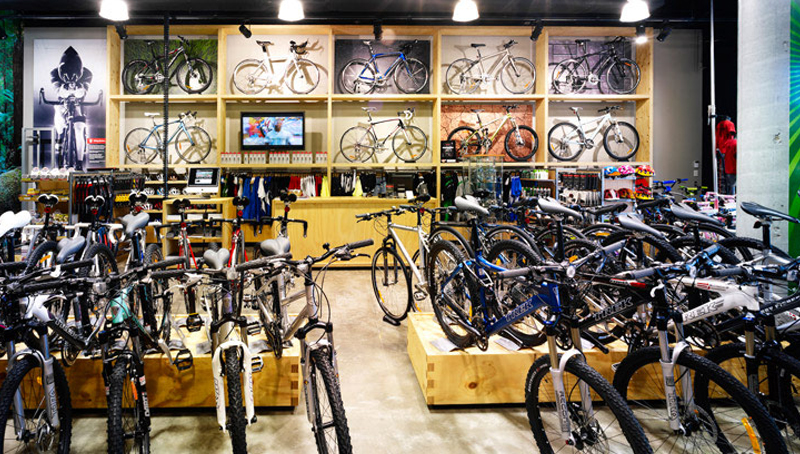

# Bike store sales
Let's take a look at what you've learned so far and analyze sales made from bike stores.

Follow this data in a [Google Spreadsheet](https://docs.google.com/spreadsheets/d/1_mGG9HQ3TsyuOTipM5mCQTS3_fn9cUUBtvkMO9rteds/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load the data
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

The data frame in python looks a lot like the `.csv` file we could view in Excel. There are some new restrictions. For example, each column has a strict type that we won't be able to change without coding. 

## A quick exploration of the sales data

Let's start exploring this data frame to examine what we're working with.

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


The `.shape` of our data frame tells us how many rows and columns we have

In [4]:
sales.shape

(113036, 18)

You can imagine that with over 100K rows it's not so simple to follow a visual representation of the data. This is how analysis starts. Once we load our data we want to find out the properties of the data we're working with. `.info()` will tell us more information about the columns in our data frame.

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

We have `Date` which is a `datetime` field; we have `Day`, `Month`, and `Year` which are compliments to our `Date` variable. We have the `Customer_Age` which is an integer, and more. Again, now we have an idea of the kinds of information we have to work with and we also know how large the data set is. There may be some data cleaning to do, but for now just getting an understanding of the structure of our data is enough to start.

Let's take a look at the statistical properties of this data frame. The `describe()` method allows us to quickly summarize the numeric fields in our data frame.

In [6]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


The average age of our customers is around 36 years old and the oldest person in our data frame is 87. Again, we're just trying to build our understanding of the physical properties of the data frame. For instance, the median `Customer_Age` is close to my mean `Customer_Age` which suggests that the distribution of `Customer_Age` is somewhat symmetric. 

By exploring the statistical summary of our data we can begin to find anomalies or values that might warrant further inquiry. For example, I see the minimum profit is negative. I wonder if that's a mistake? Nevertheless, this exploration allows us to generate ideas for analysis without constantly referring to a visual representation of the data. 

## Numerical analysis and visualization

Let's take one variable, `Unit_Cost` and examine it a bit more.

In [7]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

This is the same information that we obtained above; however, above we generated statistics for all the columns we could in our data frame where here we are limiting our analysis to `Unit_Cost` alone.

I could also generate individual statistics like the mean and median.

In [8]:
sales['Unit_Cost'].mean()

267.296365759581

In [9]:
sales['Unit_Cost'].median()

9.0

Let's use the `.plot()` command to produce some exploratory graphics of `Unit_Cost`. 

<AxesSubplot:>

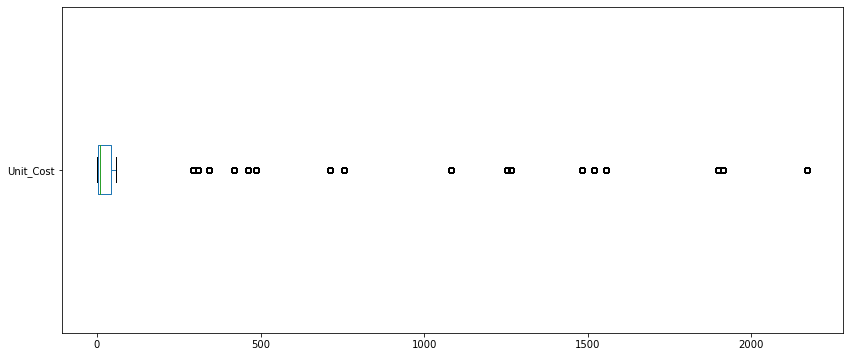

In [10]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

This code uses tricks from `pandas` along with functions from `matplotlib`. The box and whisker plot, sometimes simply called the box plot, is a type of graph that help visualize the five-number summary. It doesn’t show the distribution in as much detail as histogram does, but it’s especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set. A box plot is ideal for comparing distributions because the centre, spread and overall range are immediately apparent.

Here we can see that a product with a `Unit_Cost` of $500 is considered an outlier.

We can also produce a density plot, a variation of a Histogram, to obtain a bit more detail. A density plot visualises the distribution of data over a continuous interval. The peaks of a density plot help display where values are concentrated over the interval.

<AxesSubplot:ylabel='Density'>

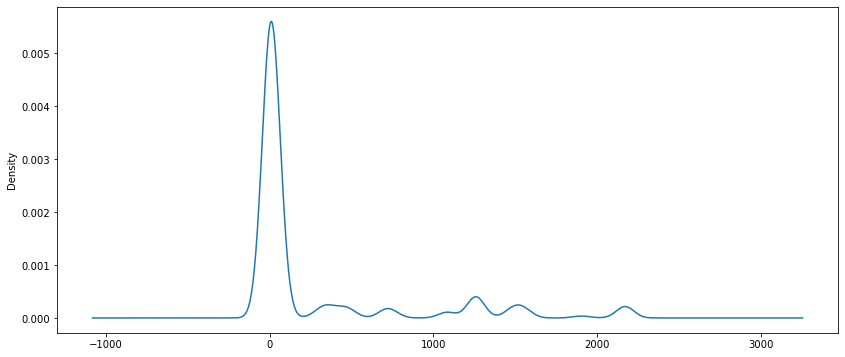

In [11]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kernel density estimator

I want to draw two plots. The first we'll create another density plot and highlight the mean and median. Notice, I can add a line to our plot using the `axvline` command.

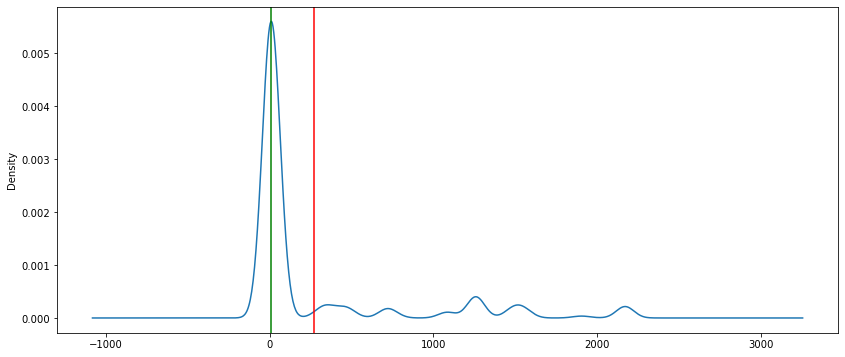

In [12]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

I also want to generate a histogram to highlight the distribution of `Unit_Cost` another way. A histogram is a bar graph-like representation of data that buckets a range of outcomes into columns along the x-axis. The y-axis represents the number count or percentage of occurrences in the data for each column and can be used to visualize data distributions. I can simply change the plot type using the `kind=` arguement.

Text(0.5, 0, 'dollars')

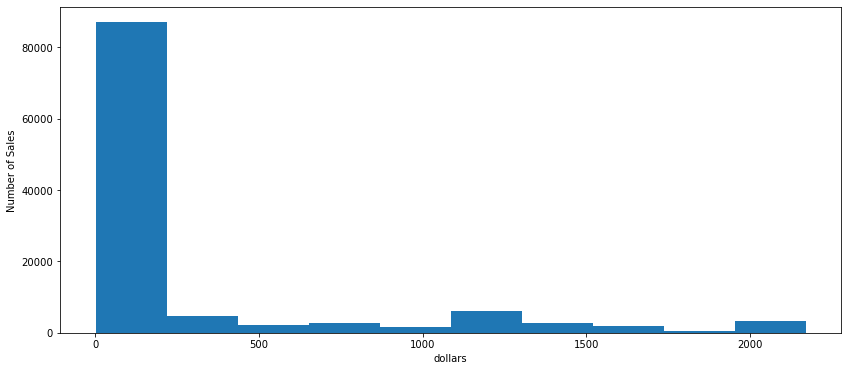

In [13]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

## Categorical analysis and visualization

Now that we've examined a numeric variable, let's turn to a categorical variable and examine it's properties. Let's analyze the `Age_Group` column. First, we'll print the top few rows of the `sales` data to get a quick reference of what `Age_Group` values exist.

In [14]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


The age of the customer is represented numerically but `Age_Group` is available and groups each customer into age ranges. I wonder how many groups there are? 

We can use the `value_counts()` function to obtain counts of customers for each unique value of `Age_Group`.

In [15]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Visualizing categorical variables is easily done with a pie chart. 

<AxesSubplot:ylabel='Age_Group'>

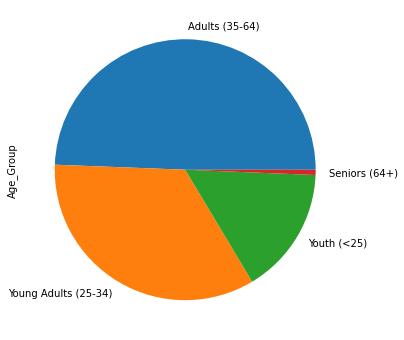

In [16]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Or better, a bar chart

Text(0, 0.5, 'Number of Sales')

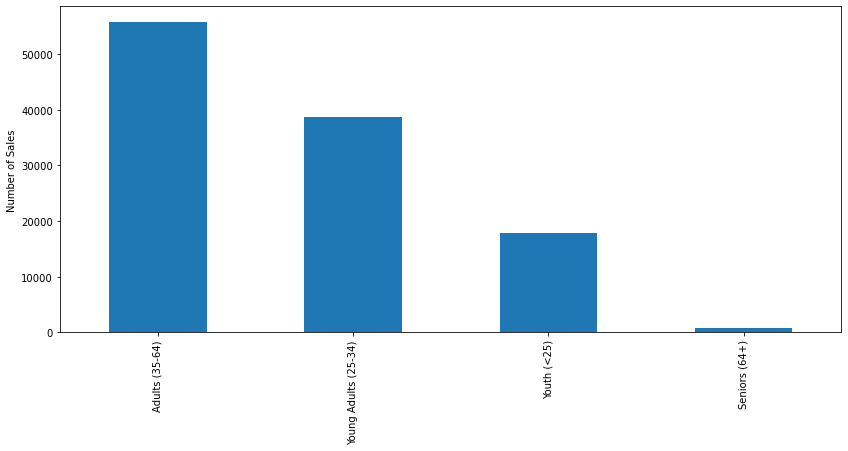

In [17]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In either the table or charts, it's clear that `Adults (35-64)` comprise the largest segment of our data.

## Relationship between the columns

After you've done some univariate exploration of your variables, you can now begin to examine some bivariate relationships. Correlation analysis allows you to quantify the association between two continuous variables.

In [18]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


We can see a high correlation between `Cost` and `Profit`, but there's not much of a relationship between `Customer_Age` and `Revenue`. 

Tables are great, but pictures are sometimes easier to digest. The `.matshow()` function displays an array as a matrix figure.

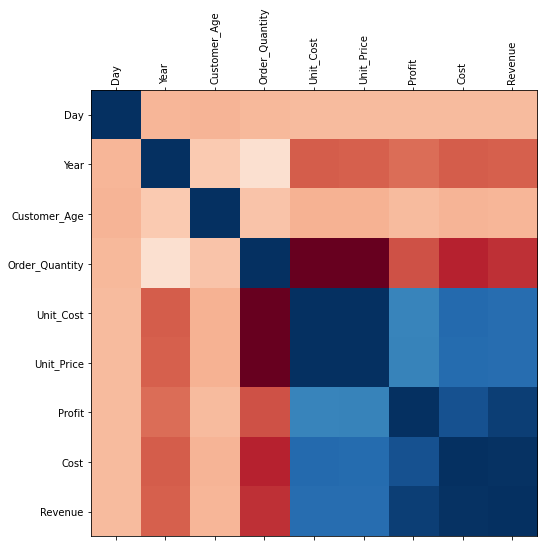

In [19]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

Now it's a little easier to see that `Profit` has a high positive correlation with `Unit_Cost`, `Unit_Price`, `Cost`, and `Revenue`. There is also a negative association with `Order_Quantity`. 

We can also generate scatterplots to look at the nature of the relationship between two quantitative variables. 

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

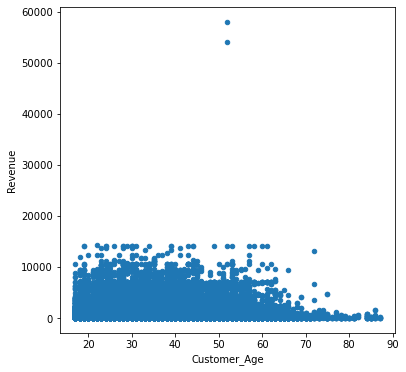

In [20]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

This is junked. There doesn't seem to be any association between `Customer_Age` and `Revenue`. This was also evidenced by the correlation coefficient estimate between the two of -0.009326.

Let's try another pair. How about `Revenue` and `Profit`.

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

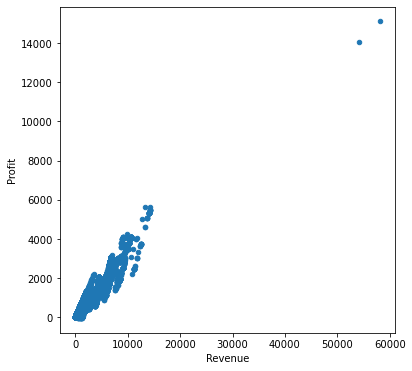

In [21]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Here we see a strong positive linear association. 

What about comparing a categorical and numeric variables? I think the best way to display numeric variables against a categorical variable is with side-by-side boxplots. Here I diplay `Profit` across the different `Age_Group`'s. 

Text(0, 0.5, 'Profit')

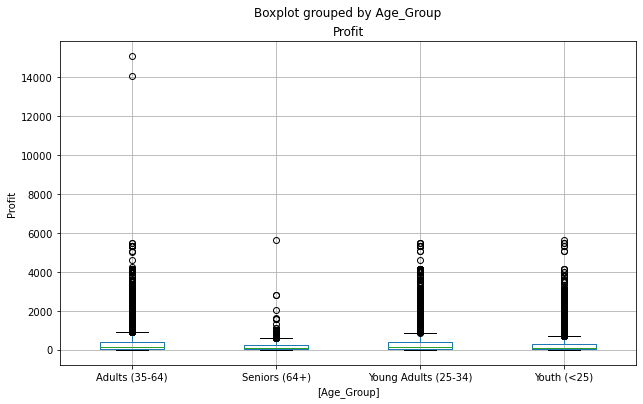

In [22]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Running boxplot code for every variable in your data set can get somewhat cumbersome depending on how many columns you have in your data set. We could create an object of variable names to generate plots of chosen variables. 

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

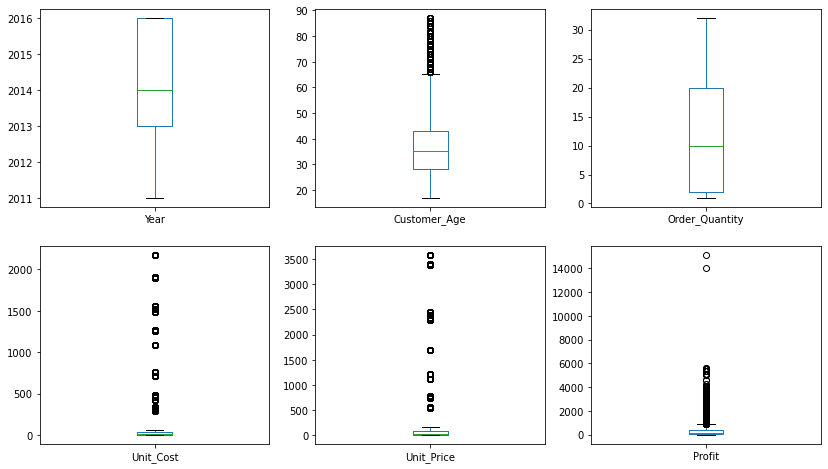

In [23]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

## Column wrangling

Once you get an idea of what's in the data, you can then begin to reshape it if necessary. Generally, the raw data doesn't have every variable you may want and often the combination of variables as a new measure is more interesting than the raw values themselves. This exercise isn't unique to analysis in `Python`. In fact you'll often see analysts create new columns when conducting analysis in any software.

### Calculate `Revenue_Per_Age` and add it to the `sales` data

Let's add a new column called Revenue_Per_Age by dividing `Revenue` by `Customer_Age`

In [24]:
sales['Revenue_Per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_Per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_Per_Age, dtype: float64

The calculation on over 100K rows is instantaneous. A lot faster than performing the calculations in Excel.

We can plot this new variable using either a density plot or histogram

<AxesSubplot:ylabel='Density'>

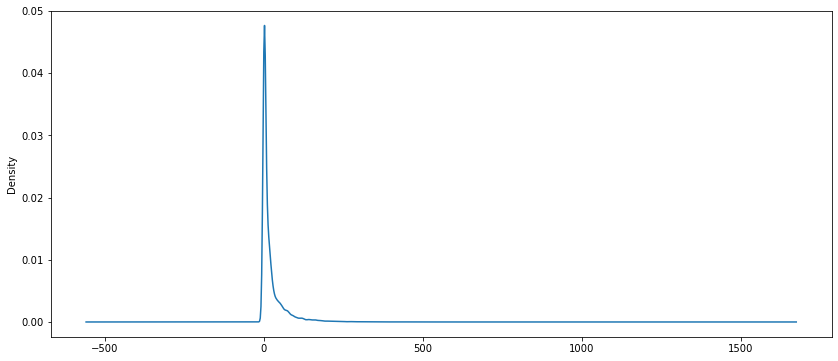

In [25]:
sales['Revenue_Per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

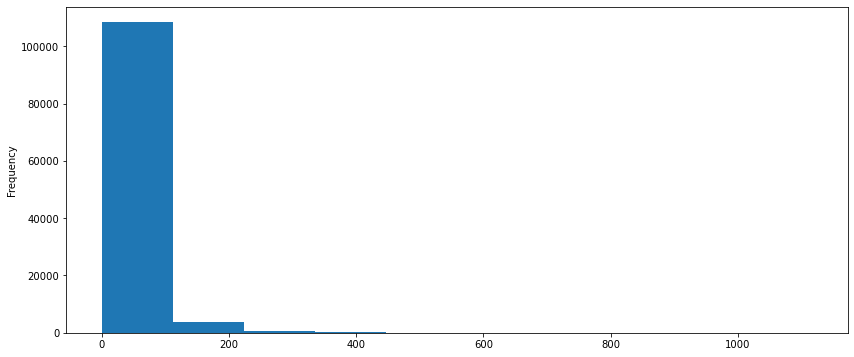

In [26]:
sales['Revenue_Per_Age'].plot(kind='hist', figsize=(14,6))

### Calculate `Calculated_Cost` and add it to the `sales` data

Let's add another column called `Calculated_Cost` which will be the total cost of the order by multiplying the `Unit_Cost` and the `Order_Quantity`. We'll use this formula:

$Calculated\_Cost = Order\_Quantity * Unit\_Cost$

In [27]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

I calculate this because I'm not sure about the `Cost` field in our data. Here's just a quick idiot check of our new column `Calculated_Cost` and `Cost` provided in the data.

In [28]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

Here we're asking whether our `Calculated_Cost` column is not the same as `Cost`. The parentheses ask the question by returning a logical `True` or `False` value for every row in our data. We use `.sum()` to just estimate the number of times in our data `Calculated_Cost` does not equal `Cost`. In this case it never happens.

We can also visualize the relationship between `Calculated_Cost` and `Profit` using a scatterplot.

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

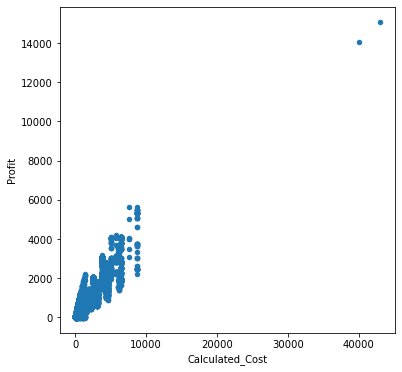

In [29]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

We see a strong positive linear relationship between `Calculated_Cost` and `Profit`.

### Calculate `Calculated_Revenue` and add it to the `sales` data

Revenue is simply the sum of `Cost` and `Profit` given by this formula:
    
$ Calculated\_Revenue = Cost + Profit $

In [30]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

Again, we can check that our calculated value mirrors the given value.

In [31]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

And again we see that our calculation and the given value are the same.

We can examine this column graphically by creating a histogram of the `Revenue`.

<AxesSubplot:ylabel='Frequency'>

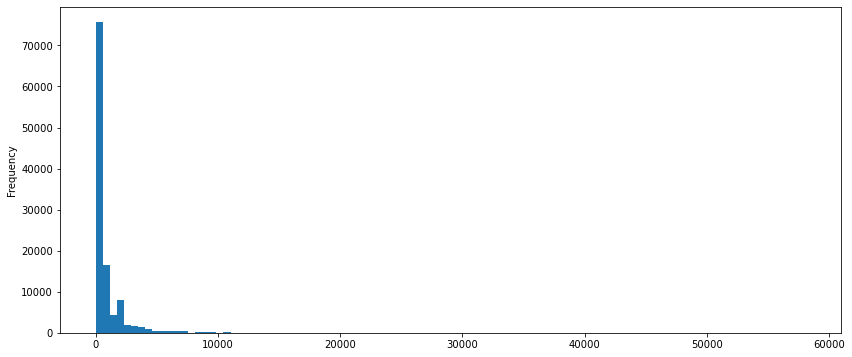

In [32]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

Now let's take a look at some subtasks that might be necessary when conducting analysis of this type of data.

### Modify `Unit_Price` by adding a 3% tax.

In [33]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

To increase the prices by 3%, we simply need to multiply each `Unit_Price` by 1.03.

In [34]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03
sales['Unit_Price'] *= 1.03 # cool shorthand way
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

What else might we want to do? Now that we have a data set worthy of analysis and we know what's actually in this data set, we could get all the sales from a particular state.

### Get all the sales made in the state of `Kentucky`

The `loc()` function in `pandas` allows us to access a group of rows and columns by label(or a boolean array).

In [35]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_Per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


### Get the mean revenue of the Adults (35-64) sales group

We could get the average sales by age group.

In [36]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group Youth (<25) or Adults (35-64)?

In this case we want all the sales from either Youth or Adult

In [37]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group Adults (35-64) in United States

In [38]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [39]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [40]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

All these filtering options are relatively straightforward to obtain in `Python`